In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("9-seismic_activity_svm.csv")

In [3]:
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
0,9.539392,-3.000000,0
1,9.558241,-2.939394,0
2,9.576669,-2.878788,0
3,9.594678,-2.818182,0
4,9.612272,-2.757576,0


In [4]:
df["seismic_event_detected"].value_counts()

seismic_event_detected
0    200
1    200
Name: count, dtype: int64

In [5]:
df.isnull().sum()

underground_wave_energy     0
vibration_axis_variation    0
seismic_event_detected      0
dtype: int64

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   underground_wave_energy   400 non-null    float64
 1   vibration_axis_variation  400 non-null    float64
 2   seismic_event_detected    400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<Axes: xlabel='underground_wave_energy', ylabel='vibration_axis_variation'>

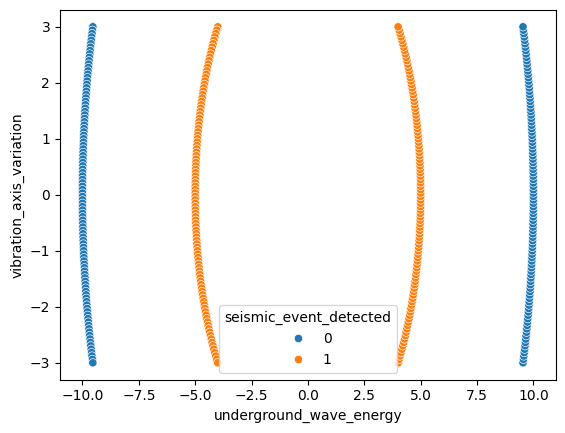

In [7]:
sns.scatterplot(x = df["underground_wave_energy"] , y = df["vibration_axis_variation"] , hue = df["seismic_event_detected"])

In [8]:
df.columns

Index(['underground_wave_energy', 'vibration_axis_variation',
       'seismic_event_detected'],
      dtype='str')

In [9]:
df["underground_wave_energy **2"] = df["underground_wave_energy"] **2

In [10]:
df["vibration_axis_variation **2"] = df["vibration_axis_variation"] **2

In [11]:
df["underground_wave_energy*vibration_axis_variation"] = df["underground_wave_energy"] * df["vibration_axis_variation"]

In [12]:
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected,underground_wave_energy **2,vibration_axis_variation **2,underground_wave_energy*vibration_axis_variation
0,9.539392,-3.000000,0,91.000000,9.000000,-28.618176
1,9.558241,-2.939394,0,91.359963,8.640037,-28.095434
2,9.576669,-2.878788,0,91.712580,8.287420,-27.569197
3,9.594678,-2.818182,0,92.057851,7.942149,-27.039548
4,9.612272,-2.757576,0,92.395776,7.604224,-26.506569


In [13]:
X = df.drop("seismic_event_detected" , axis = 1)
y = df["seismic_event_detected"]

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [15]:
X_train

,underground_wave_energy,vibration_axis_variation,underground_wave_energy **2,vibration_axis_variation **2,underground_wave_energy*vibration_axis_variation
3,9.594678,-2.818182,92.057851,7.942149,-27.039548
18,9.816077,-1.909091,96.355372,3.644628,-18.739784
202,4.088102,-2.878788,16.712580,8.287420,-11.768779
250,4.999908,0.030303,24.999082,0.000918,0.151512
274,4.774435,1.484848,22.795225,2.204775,7.089312
...,...,...,...,...,...
71,9.914742,1.303030,98.302112,1.697888,12.919209
106,-9.646221,2.636364,93.049587,6.950413,-25.430947
270,4.843179,1.242424,23.456382,1.543618,6.017283
348,-4.999173,0.090909,24.991736,0.008264,-0.454470


In [16]:
import plotly.express as px

In [17]:
fig = px.scatter_3d(df,x="underground_wave_energy **2",y="vibration_axis_variation **2",z= "underground_wave_energy*vibration_axis_variation",
                    color="seismic_event_detected")
fig.show()

In [18]:
linear = SVC(kernel="linear")

In [19]:
linear.fit(X_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [21]:
y_pred = linear.predict(X_test)

In [22]:
accuracy_score(y_pred,y_test)

1.0

In [23]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

